### 타이타닉 생존률을 위한 데이터 분석 - EDA(Expioratory Data Analysis)기반 데이터 분석
- EDA는 데이터를 시각화하고 요약 통계를 이해함으로써 데이터 구조, 이상치, 패턴 등을 발견하는 활동(과정) 입니다.
- 데이터 분석 과정의 초기단계에서 중요한 역할을 하며, 데이터에 대한 초기 통찰을 얻어 모델링 작업을 위한 기초를 다져 봅니다.

EDA의 주요 목적
- 데이터 이해
- 이상치 발견
- 가설 설정
- 데이터 변환

EDA의 주요 기법
- 기술 통계 : 평균, 중앙값, 분산, 표준 편차 등 기본 통계량을 계산하여 데이터의 특성을 파악합니다.
- 데이터 시각화 - seaborn
- 상관분석: 두 변수 간의 상관관계를 분석하여 변수 간의 관계를 파악합니다.
- 히트맵(Heatmap): 상관관계를 시작적으로 표현 합니다.

### 시작하기
- 머신러닝에는 데이터 전처리, 회귀, 분류, 군집화, 연관규칙학습, 강화학습, 자연어처리 등 다양한 분야가 있다.
- 머신러닝 모델을 구축할 때 올바른 데이터로 훈련하기 위해서는 반드시 데이터 전처리 단계부터 시작해야 합니다.

### 머신 러닝 모델 학습을 위한 구현 순서
1. 라이브러리 임포트
2. 데이터셋 임포트
3. 결측데이터 처리
4. 범주형 데이터 인코딩 방법(원- 핫 인코딩)
5. 데이터 세트를 훈련세트와 테스트 세트로 나누기
6. 특성 스케일링(필수아님 - 필요여부에 따라)

* 한글 폰트 적용 위한 공통 코드작업 - 내가

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #한글 폰트 관련

공통 코드 - 한글 폰트 설정
- 경로주기
    - 상대경로 : 클라우드나 웹서버에 올릴때 경로 이슈를 해결 할 수 있다.
    - 하나 위의 경로는 ../로 사용하고 현재 바라보는 경로는 ./를 사용합니다.
    예) pythonbasic > EDAProject > XXX.ipynb
    한글 글꼴 파일의 위치
    pythonbasic > malgun.ttf

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
path = "../malgun.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc('font', family="Malgun Gothic")

python의 경고 메시지를 무시하는 설정이 있습니다.   
경고 메시지가 출력되지 않게 만들어, 경고로 인한 코드 실행이 방해 받지 않도록 할 수 있습니다.

In [3]:
import warnings
warnings.filterwarnings(action = "ignore")

In [4]:
#훈련 데이터
df_titanic = pd.read_csv("../data/titanic/train.csv")
#테스트 데이터(답안지)
df_test = pd.read_csv("../data/titanic/test.csv")
#1번클립 - EDA실습, 분포, 차트, 시각화 분석, 데이터 전처리, 결측처리.....
#2번클립 - 머신러닝(회귀,분류), 손실율(기준-판단), 레포팅 작업
#목표 : Survived컬럼인 생존 야부를 예측하는 프로젝트 입니다.
submission = pd.read_csv("../data/titanic/gender_submission.csv")

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_titanic.head(5)
#앞쪽에서5개

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
df_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치를 seaborn활용하여  시각화하기

In [16]:
import seaborn as ans
#insert here

### 2-1. Target 변수 찾기(Survived)

In [18]:
df_titanic["Survived"].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

<Axes: ylabel='count'>

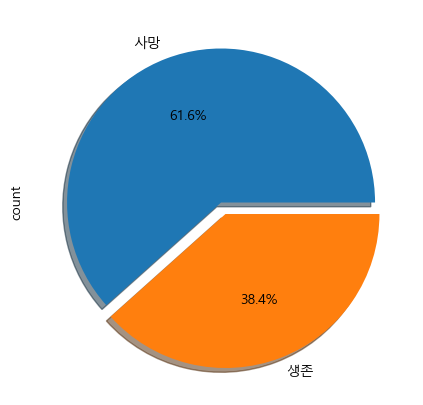

In [19]:
plt.figure(figsize=(8,5))
labels = ["사망","생존"]
df_titanic["Survived"].value_counts().plot.pie(explode=[0,0.08]
                                               ,shadow = True
                                               ,autopct = "%1.1f%%"
                                               ,labels = labels)

사망 비율은 61.6%, 생존비율은 38.4%로 사망한 탑승객의 수가 더 많은 것으로 확인 된다.

In [21]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df_titanic["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 2-2. 성별(남성:male, 여성:female)
남성의 탑승자 수가 더 많지만 여성의 생존자 수가 더 많다.

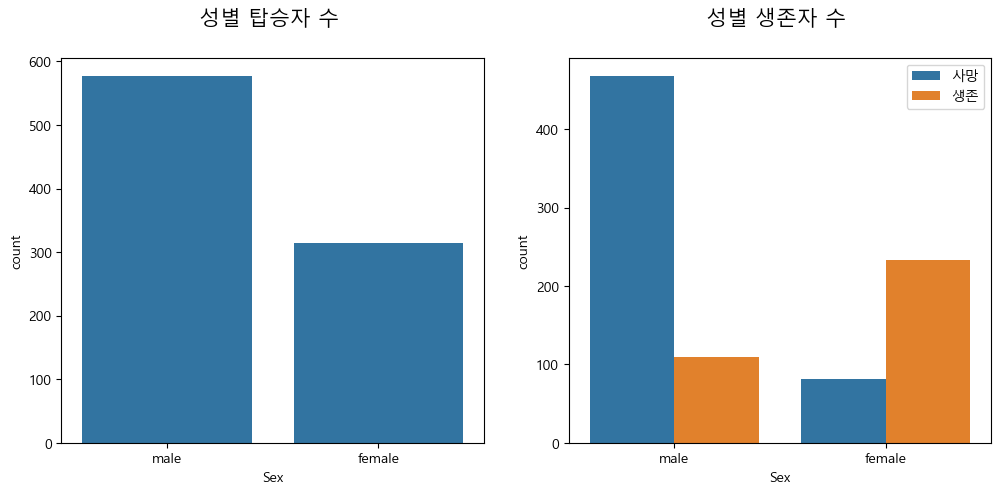

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=df_titanic, ax=axes[0])
axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=df_titanic, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

### 2-3. 티켓 클래스(Pclass)
- 티켓 클래스별로 어떤 생존률을 보이고 있는가?
    - 1등석의 생존률은 약 63%, 2등석의 생존률은 약 47.3%, 3등석의 생존률은 약 24.2%이다.
    - 3등석 탑승객들이 많이 사망한 것으로 보인다.

In [7]:
df_titanic[["Pclass","Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


위 결과를 시각화 해서 살펴 봅니다.
- 3등석 탑승객이 가장 많고, 또한 3등석의 탑승객의 사망 인원수가 가장 많습니다.
- 상대적으로 1등석 탑승객들은 많이 살아남은 것으로 보인다.
- 티켓 클래스는 생존 여부에 영향을 끼치는 것으로 보인다. 

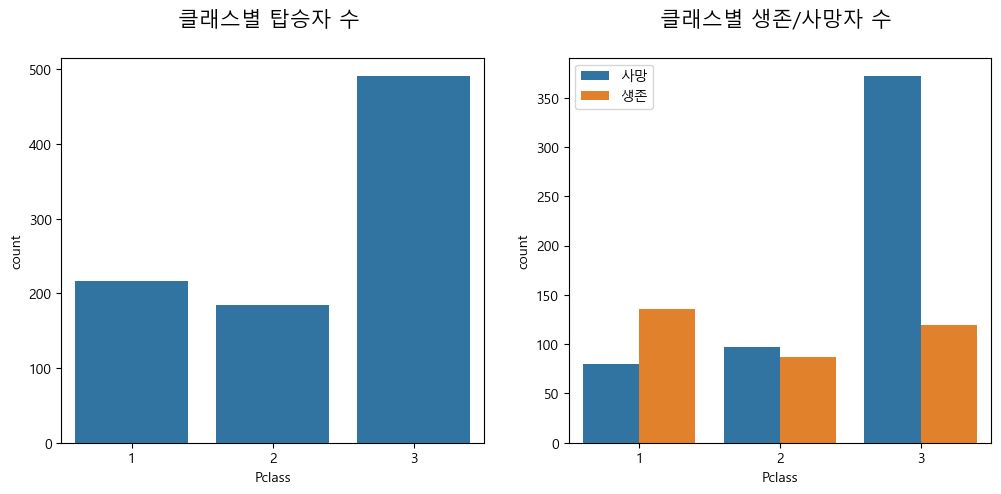

In [8]:
# 시각화 실습 - 1,2했을 때 두 개의 차트
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title("클래스별 탑승자 수 \n", size=15)
sns.countplot(x="Pclass", data=df_titanic, ax=axes[0])
axes[1].set_title("클래스별 생존/사망자 수 \n", size=15)
sns.countplot(x="Pclass", hue="Survived", data=df_titanic, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

### 2-4. 나이(Age)
- 결측치가 존재하는지 여부
- 탑승객들의 평균 나이는 30세입니다.

In [9]:
df_titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

나이의 분포를 보면 탑승객들의 나이는 주로 20~40세에 분포하고 있습니다.

<Axes: xlabel='Age', ylabel='Density'>

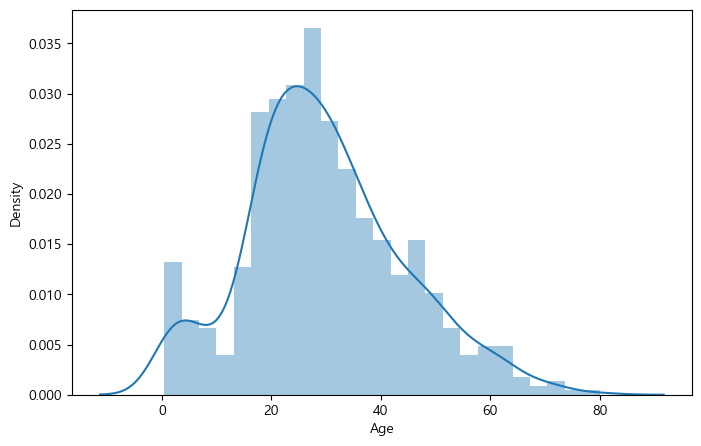

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(df_titanic['Age'],bins=25)

### 2-5. 함께 탑승한 가족의 수(Sipsp,Parch)
SibSp: 함께 탑승한 형제자매, 배우자 총합
Parch: 함께 탑승한 부모, 자녀 수 총합
SibSp, Parch: 모두 가족 수 이므로 비슷한 경향을 가질 것이다.

In [12]:
df_titanic[["SibSp","Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
df_titanic[["Parch","Survived"]].groupby(["Parch"]).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


SibSp - 형제자매, 배우자 총합
- 혼자 탑승한 사람보다 3명,4명의 SibSp와 탑승한 탑승객들의 사망률이 가장 높다.   
Parch - 부모, 자녀 총합
- 부모, 자녀 없이 혼자 탑승한 사람의 사망률이 가장 높다.

### 2-6. 탑승 항구(Embarked)